# Data Exploration

In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
metadata = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv')

# Removing the unnecessary columns
metadata.drop(columns=['Unnamed: 11'], inplace=True)

# Print the shape of the DataFrame
print(f'Shape of DataFrame: {metadata.shape}')
metadata.head()

Shape of DataFrame: (112120, 11)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [3]:
# Rename the columns to more appropriate names
metadata.rename(columns={
    'Follow-up #': 'Follow_Up_Number',
    'Patient ID': 'Patient_ID',
    'Patient Age': 'Patient_Age',
    'OriginalImage[Width': 'OriginalImage_Width',
    'Height]': 'OriginalImage_Height',
    'OriginalImagePixelSpacing[x': 'OriginalImagePixelSpacing_X',
    'y]': 'OriginalImagePixelSpacing_Y'
}, inplace=True)
metadata.head()

,Image Index,Finding Labels,Follow_Up_Number,Patient_ID,Patient_Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_X,OriginalImagePixelSpacing_Y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [4]:
# Stats
metadata.describe()

,Follow_Up_Number,Patient_ID,Patient_Age,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_X,OriginalImagePixelSpacing_Y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


Max value in Patient age is 414 years that is not a valid value. Let's Check and set this column.

In [5]:
# Filter out invalid ages (more than 100 years)
invalid_age_count = metadata[metadata['Patient_Age'] > 100].shape[0]
print(f'Number of people with age more than 100 years: {invalid_age_count}')

Number of people with age more than 100 years: 16


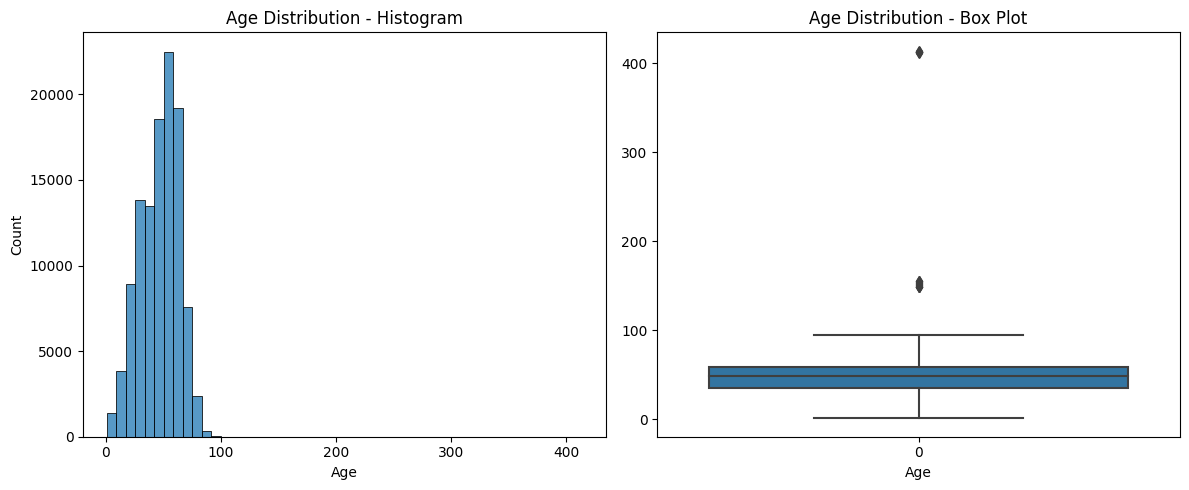

In [6]:
# Plot age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(metadata['Patient_Age'], bins=50, ax=axes[0])
axes[0].set_title('Age Distribution - Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Box plot
sns.boxplot(metadata['Patient_Age'], ax=axes[1])
axes[1].set_title('Age Distribution - Box Plot')
axes[1].set_xlabel('Age')

plt.tight_layout()
plt.show()


That's mean those 16 values are just the invalid values and are being marked as outliers in boxplot. So let's drop them.

In [7]:
# Dropping records where Patient Age is more than 100 years
metadata = metadata[metadata['Patient_Age'] <= 100]
print(f'Shape of DataFrame after dropping invalid ages: {metadata.shape}')

Shape of DataFrame after dropping invalid ages: (112104, 11)


Total Unique Multi-Labels are:  821
Number of records with multi-labels: 20792


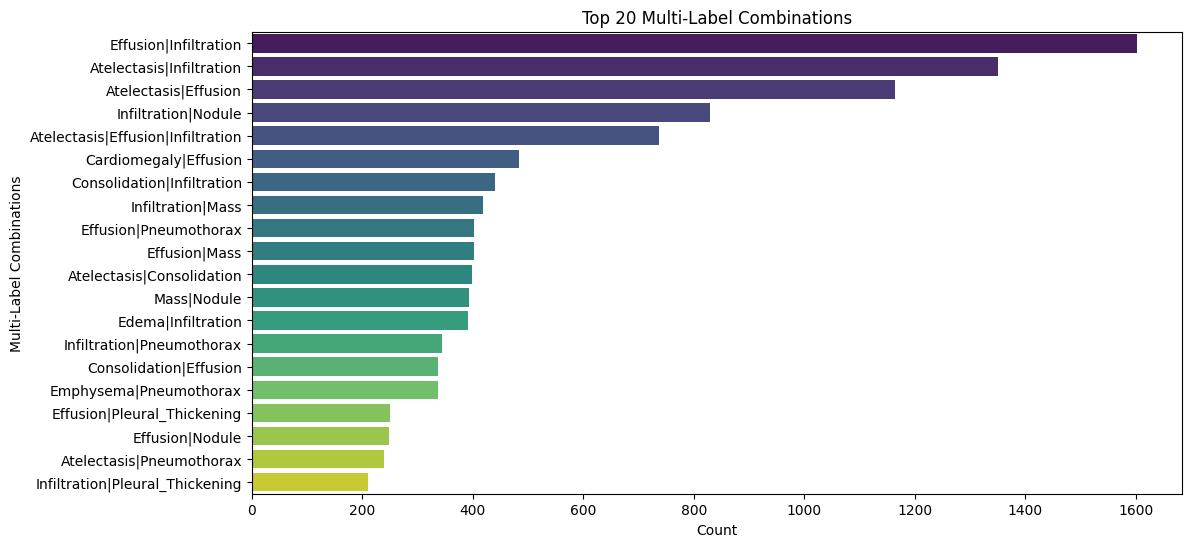

In [8]:
# Finding records with multi-labels, their count and total records
multi_label_data = metadata[metadata['Finding Labels'].str.contains('\|')]
multi_labels = multi_label_data['Finding Labels'].value_counts()
multi_label_count = multi_label_data.shape[0]
print("Total Unique Multi-Labels are: ", len(multi_labels))
print(f'Number of records with multi-labels: {multi_label_count}')

# Plotting the top 20 multi-label combinations
plt.figure(figsize=(12, 6))
top_20_multi_labels = multi_labels[:20]
sns.barplot(x=top_20_multi_labels.values, y=top_20_multi_labels.index, palette='viridis')
plt.title('Top 20 Multi-Label Combinations')
plt.xlabel('Count')
plt.ylabel('Multi-Label Combinations')
plt.show()


Total Unique Single-Labels are:  15
Number of records with single-labels: 91312


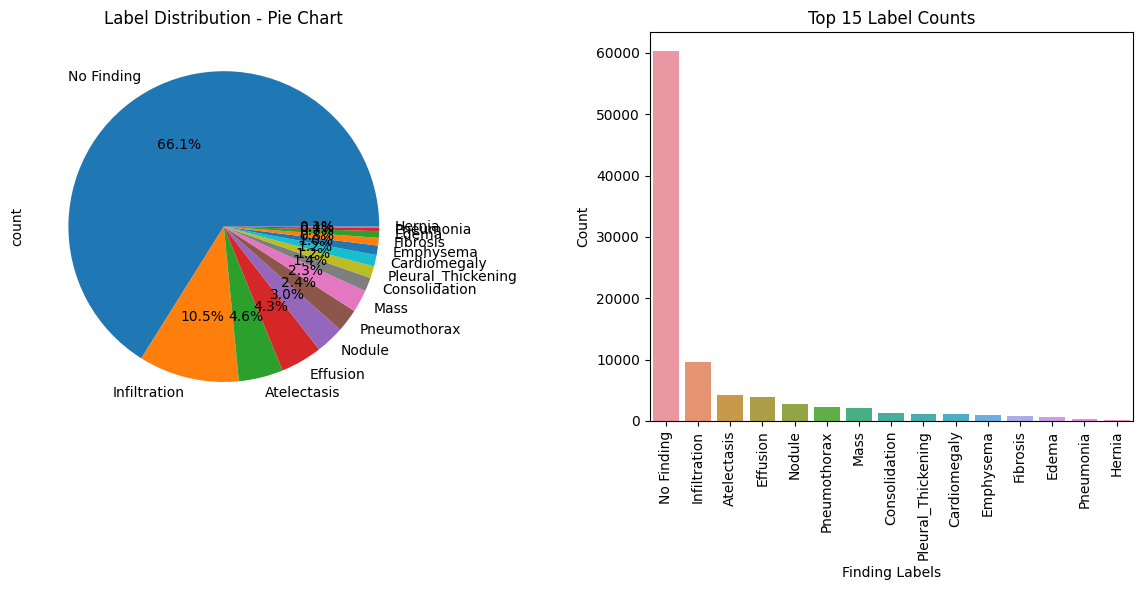

In [9]:
# Filter out records with multiple labels
single_label_data = metadata[~metadata['Finding Labels'].str.contains('\|')]
unique_labels = single_label_data['Finding Labels'].unique()
top_label_counts = single_label_data['Finding Labels'].value_counts()[:15]
print("Total Unique Single-Labels are: ", len(unique_labels))
print(f'Number of records with single-labels: {len(single_label_data)}')

# Set up the plotting area
plt.figure(figsize=(12, 6))

# Plot a pie chart of label distribution
plt.subplot(1, 2, 1)
single_label_data['Finding Labels'].value_counts().plot(kind="pie", autopct='%.1f%%')
plt.title('Label Distribution - Pie Chart')

# Plot a count plot of the top 15 labels
plt.subplot(1, 2, 2)
sns.countplot(x=single_label_data['Finding Labels'], order=top_label_counts.index)
plt.xticks(rotation=90)
plt.title('Top 15 Label Counts')
plt.xlabel('Finding Labels')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


In [10]:
# Function to plot KDE for numerical features by single labels
def plot_kde_by_label(feature, title):
    # Set up the plotting area
    plt.figure(figsize=(12, 6))
    plt.title(title)

    # Plot the KDE for each single label
    for label in single_label_data['Finding Labels'].value_counts().index:
        sns.kdeplot(x=single_label_data[single_label_data['Finding Labels'] == label][feature], label=label)

    # Grid and Legend
    plt.grid(True)
    plt.legend()
    plt.show()

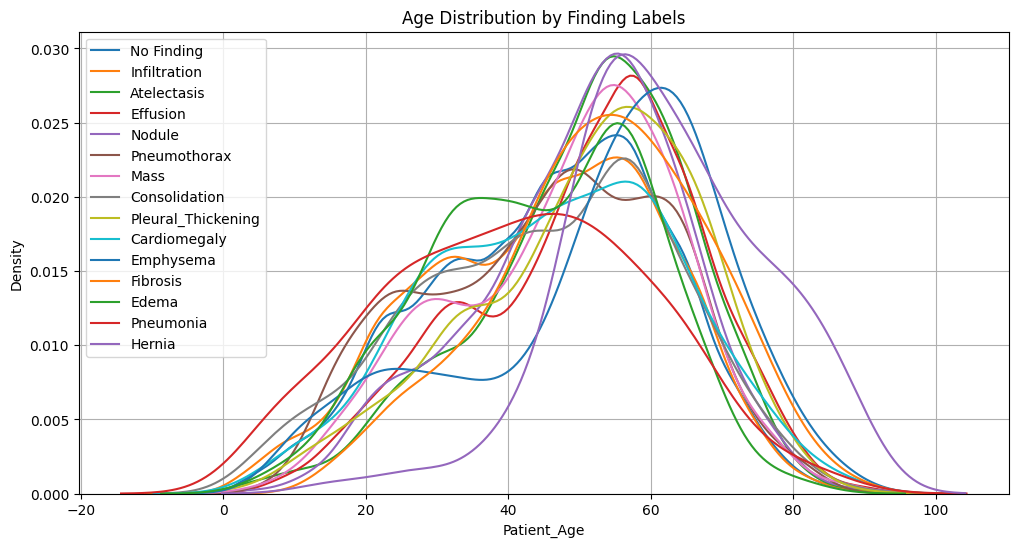

In [11]:
# Plot KDE for Patient Age
plot_kde_by_label('Patient_Age', "Age Distribution by Finding Labels")

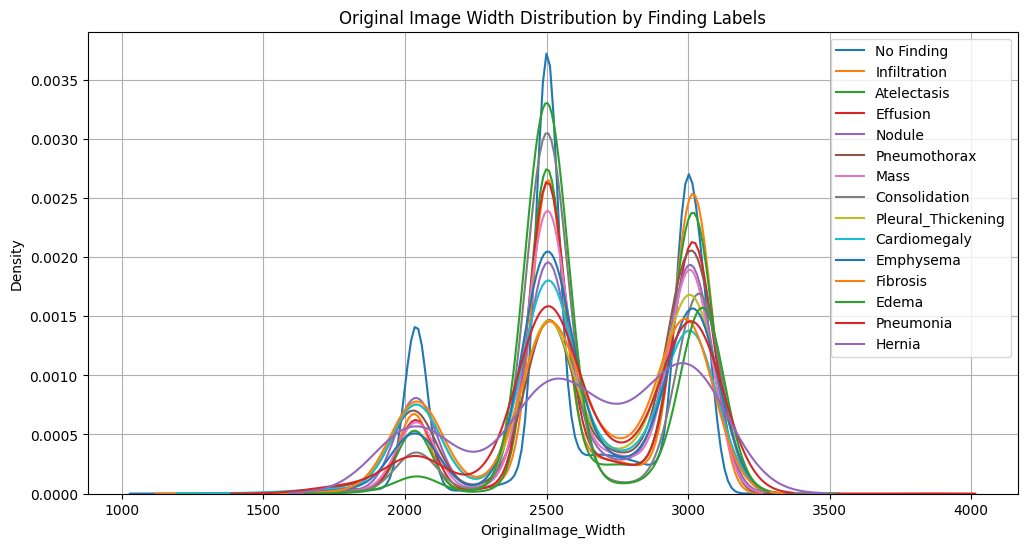

In [12]:
# Plot KDE for OriginalImage Width
plot_kde_by_label('OriginalImage_Width', "Original Image Width Distribution by Finding Labels")

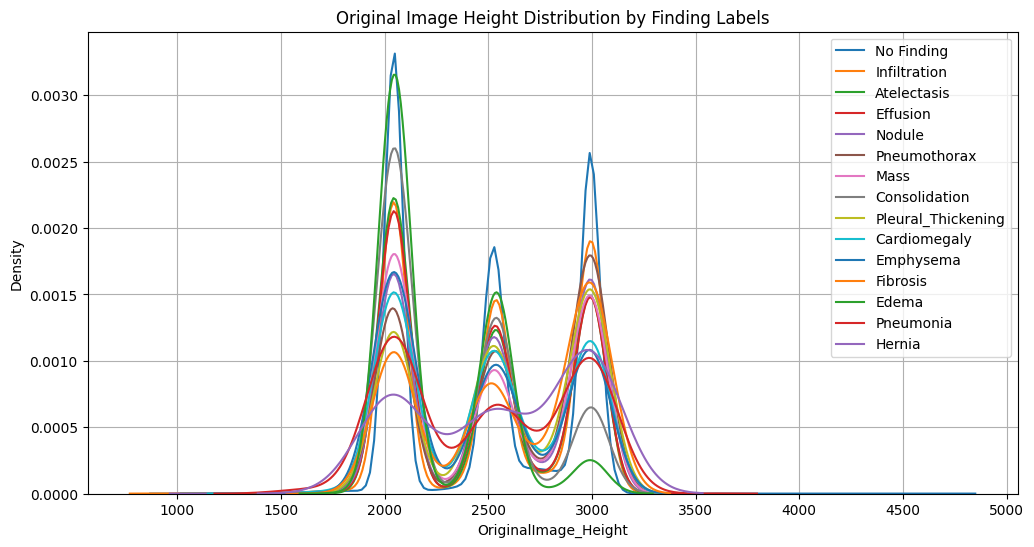

In [13]:
# Plot KDE for OriginalImage Height
plot_kde_by_label('OriginalImage_Height', "Original Image Height Distribution by Finding Labels")

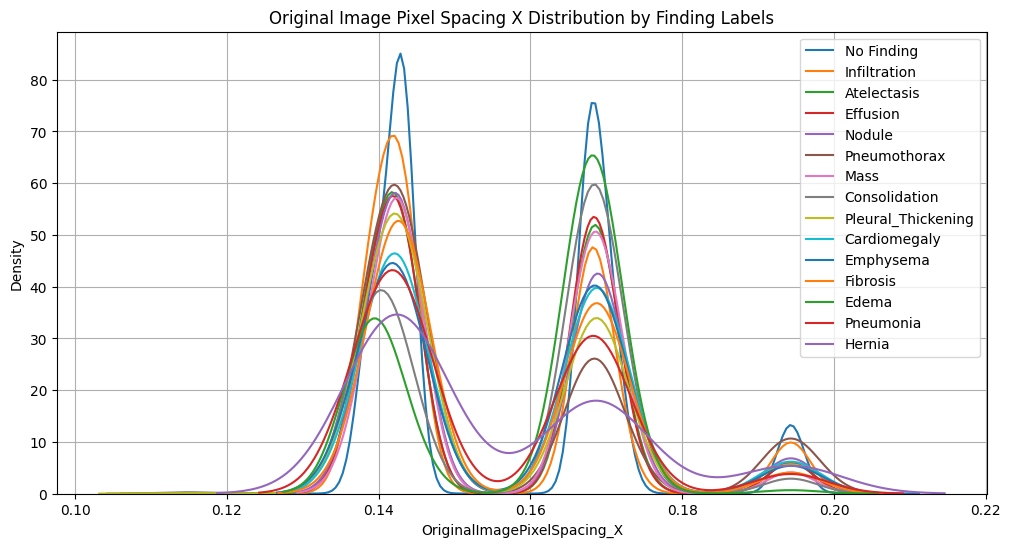

In [14]:
# Plot KDE for OriginalImagePixelSpacing X
plot_kde_by_label('OriginalImagePixelSpacing_X', "Original Image Pixel Spacing X Distribution by Finding Labels")

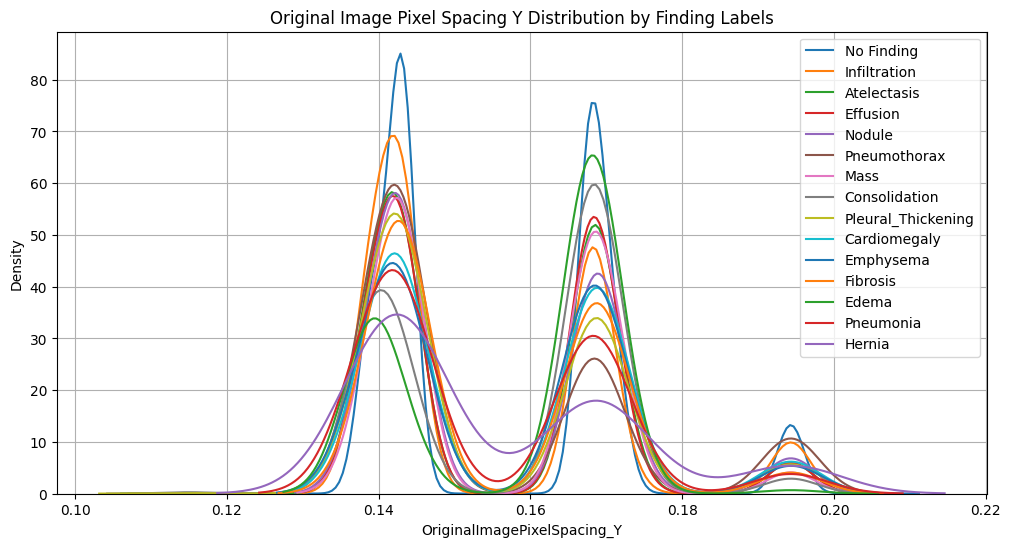

In [15]:
# Plot KDE for OriginalImagePixelSpacing Y
plot_kde_by_label('OriginalImagePixelSpacing_Y', "Original Image Pixel Spacing Y Distribution by Finding Labels")

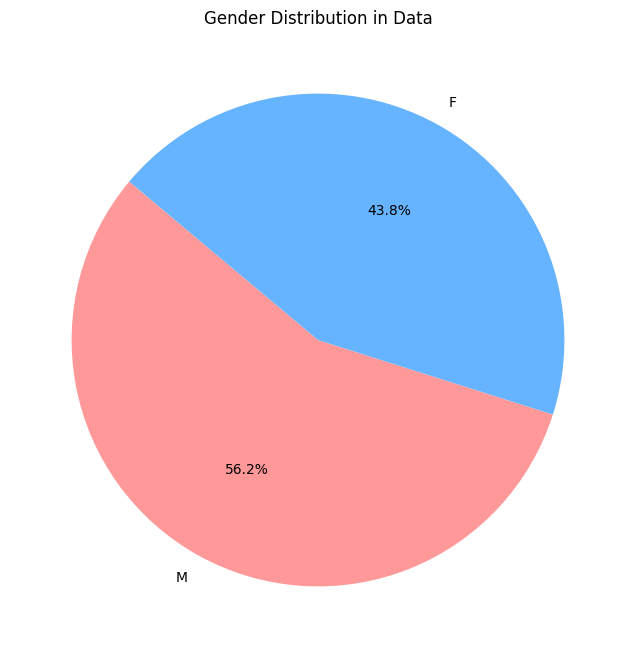

In [16]:
# Set up the plotting area
plt.figure(figsize=(8, 8))
plt.title("Gender Distribution in Data")

# Plot the pie chart for gender distribution
gender_counts = single_label_data['Patient Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.show()

<Figure size 1200x600 with 0 Axes>

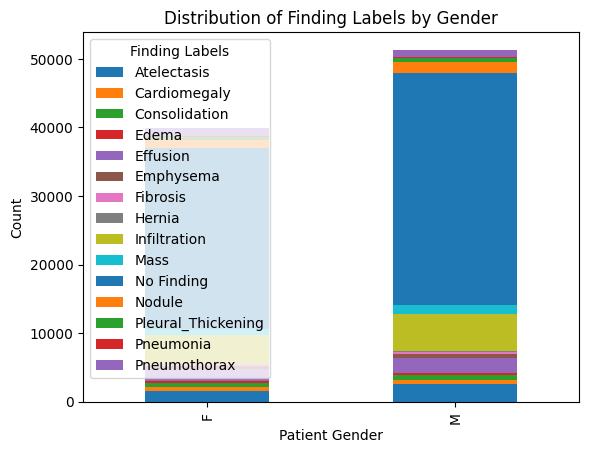

In [17]:
# Group by Patient Gender and Finding Labels and count occurrences
gender_label_distribution = single_label_data.groupby(['Patient Gender', 'Finding Labels']).size().unstack()

# Set up the plotting area for the bar chart
plt.figure(figsize=(12, 6))
gender_label_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Finding Labels by Gender')
plt.xlabel('Patient Gender')
plt.ylabel('Count')
plt.legend(title='Finding Labels')
plt.show()

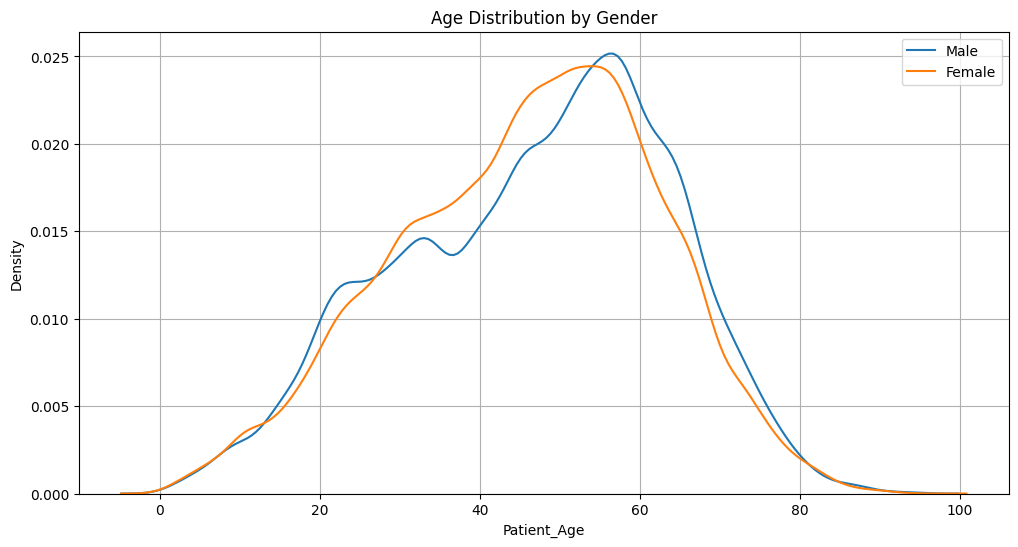

In [18]:
plt.figure(figsize=(12, 6))
plt.title("Age Distribution by Gender")

# Plot KDE for male patients
sns.kdeplot(x=single_label_data[single_label_data['Patient Gender'] == 'M']['Patient_Age'], label='Male')

# Plot KDE for female patients
sns.kdeplot(x=single_label_data[single_label_data['Patient Gender'] == 'F']['Patient_Age'], label='Female')

plt.grid(True)
plt.legend()
plt.show()

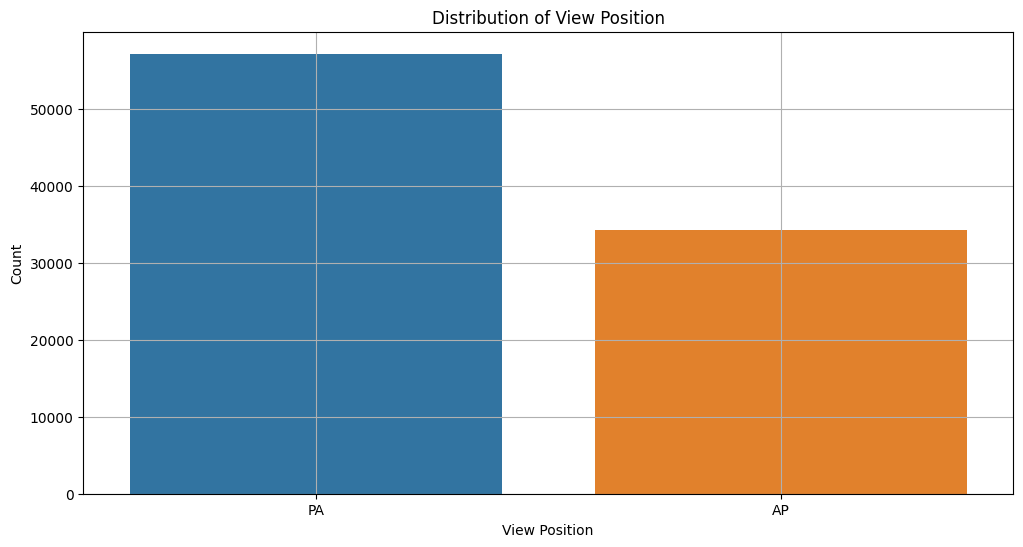

<Figure size 1200x600 with 0 Axes>

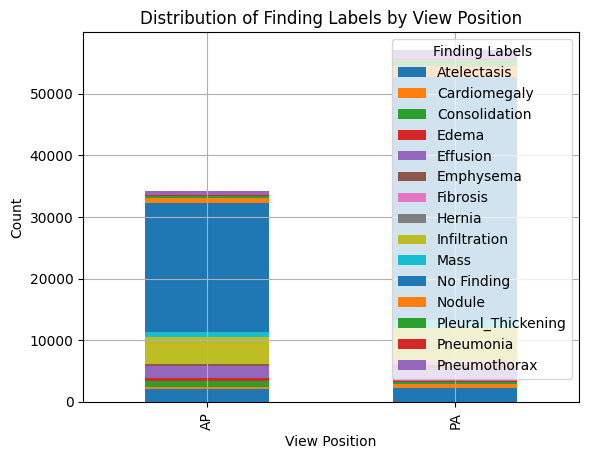

In [19]:
# Plot the distribution of View Position
plt.figure(figsize=(12, 6))
plt.title("Distribution of View Position")
sns.countplot(x=single_label_data['View Position'])
plt.xlabel('View Position')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Group by View Position and Finding Labels and count occurrences
view_position_label_distribution = single_label_data.groupby(['View Position', 'Finding Labels']).size().unstack()

# Set up the plotting area for the bar chart
plt.figure(figsize=(12, 6))
view_position_label_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Finding Labels by View Position')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.legend(title='Finding Labels')
plt.grid(True)
plt.show()

In [20]:
# Function to categorize age into groups
def categorize_age(age):
    if age <= 10:
        return 0
    elif 10 < age <= 20:
        return 1
    elif 20 < age <= 30:
        return 2
    elif 30 < age <= 40:
        return 3
    elif 40 < age <= 50:
        return 4
    elif 50 < age <= 60:
        return 5
    elif 60 < age <= 70:
        return 6
    elif 70 < age <= 80:
        return 7
    elif 80 < age <= 90:
        return 8
    elif 90 < age <= 100:
        return 9

single_label_data['Age Group'] = single_label_data['Patient_Age'].map(categorize_age)

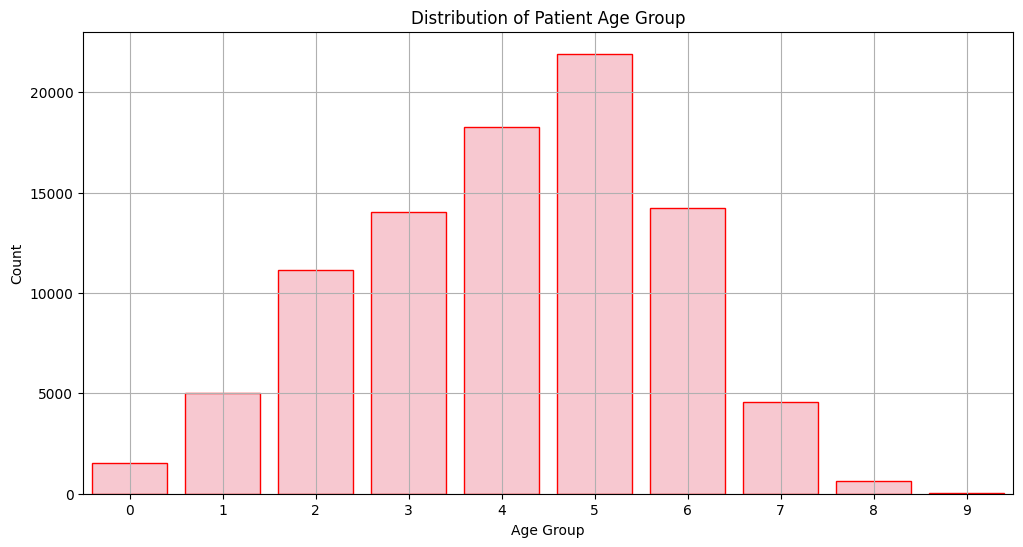

In [21]:
# Plot the distribution of patient age groups
plt.figure(figsize=(12, 6))
plt.title("Distribution of Patient Age Group")
sns.countplot(x=single_label_data['Age Group'], color='pink', edgecolor='red')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Loading Images & Preparaing Data

In [22]:
# All single labeled data
single_label_data_all = single_label_data.copy()

In [23]:
# Getting the highest disease count
highest_disease_count = single_label_data['Finding Labels'].value_counts()[1]
print(f'Highest Disease Count: {highest_disease_count}')

# No disease data equal to highest count
no_disease = single_label_data[single_label_data['Finding Labels'] == 'No Finding'].sample(highest_disease_count)

# Removing extra No Disease
single_label_data = pd.concat([single_label_data[single_label_data['Finding Labels'] != 'No Finding'], no_disease])
single_label_data.reset_index(drop=True, inplace=True)

Highest Disease Count: 9546


In [24]:
import os

def list_directories(path):
    all_entries = os.listdir(path)
    
    # Filter the entries to include only directories
    directories = [f"{path}/{entry}" for entry in all_entries if os.path.isdir(os.path.join(path, entry))]
    
    return directories

data_directory_path = "/kaggle/input/data"
images_folders = list_directories(data_directory_path)

# Function to produce image paths
def get_image_path(image_name):
    image_path = np.nan
    for folder in images_folders:
        if image_name in os.listdir(f"{folder}/images"):
            image_path = f"{folder}/images/{image_name}"
            break
    return image_path

single_label_data['path'] = single_label_data['Image Index'].apply(get_image_path)

In [25]:
# Storing metadata
single_label_data.to_csv("prepared_metadata.csv", index=False)

In [26]:
# Dropping NANs
single_label_data.dropna(inplace=True, subset=["path", 'Finding Labels'])
single_label_data.reset_index(drop=True, inplace=True)

Finding Labels
Infiltration          9546
No Finding            9546
Atelectasis           4214
Effusion              3955
Nodule                2705
Pneumothorax          2193
Mass                  2139
Consolidation         1310
Pleural_Thickening    1126
Cardiomegaly          1093
Emphysema              892
Fibrosis               727
Edema                  627
Pneumonia              322
Hernia                 110
Name: count, dtype: int64


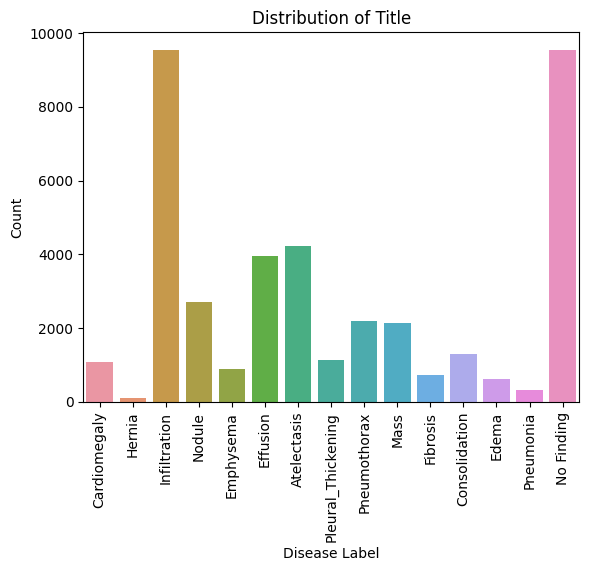

In [27]:
import matplotlib.pyplot as plt
count = single_label_data["Finding Labels"].value_counts()
print(count)


sns.countplot(x=single_label_data['Finding Labels'])
plt.xticks(rotation=90)
plt.title("Distribution of Title")
plt.xlabel('Disease Label')
plt.ylabel('Count')
plt.show()

In [28]:
print(count[count>1000])

# Filtering for Disease for which we have more than 1K records
single_label_data = single_label_data[single_label_data["Finding Labels"].isin(count[count>1000].index)]

Finding Labels
Infiltration          9546
No Finding            9546
Atelectasis           4214
Effusion              3955
Nodule                2705
Pneumothorax          2193
Mass                  2139
Consolidation         1310
Pleural_Thickening    1126
Cardiomegaly          1093
Name: count, dtype: int64


In [29]:
# Getting the highest disease count
third_highest_disease_count = single_label_data['Finding Labels'].value_counts()[2]

# Data equal to third highest count
no_disease = single_label_data[single_label_data['Finding Labels'] == 'No Finding'].sample(third_highest_disease_count)
infiltration_disease = single_label_data[single_label_data['Finding Labels'] == 'Infiltration'].sample(third_highest_disease_count)


# Removing extra No Disease
single_label_data = pd.concat([single_label_data[~single_label_data['Finding Labels'].isin(['No Finding', 'Infiltration'])], no_disease, infiltration_disease])
single_label_data.reset_index(drop=True, inplace=True)

Finding Labels
Atelectasis           4214
No Finding            4214
Infiltration          4214
Effusion              3955
Nodule                2705
Pneumothorax          2193
Mass                  2139
Consolidation         1310
Pleural_Thickening    1126
Cardiomegaly          1093
Name: count, dtype: int64


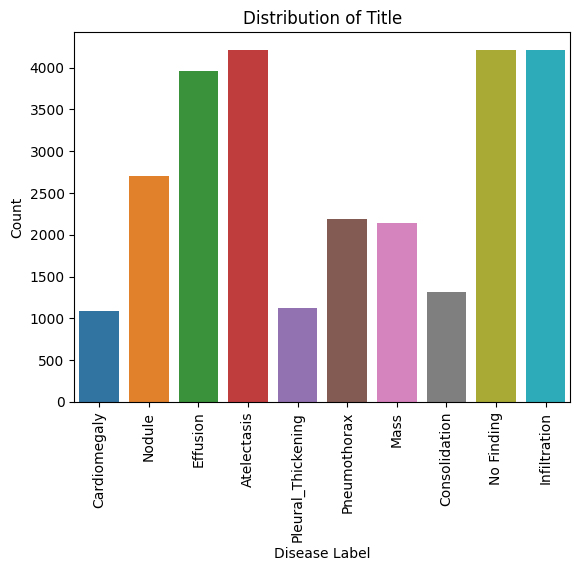

In [30]:
count = single_label_data["Finding Labels"].value_counts()
print(count)

sns.countplot(x=single_label_data['Finding Labels'])
plt.xticks(rotation=90)
plt.title("Distribution of Title")
plt.xlabel('Disease Label')
plt.ylabel('Count')
plt.show()

In [31]:
single_label_data.to_csv("final_metadata.csv", index=False)

In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess images
def load_and_preprocess_image(path, image_size=(128, 128)):
    # Load the image
    img = load_img(path, target_size=image_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize the image 0-1
    img_array /= 255.0
    
    return img_array

X_images = []
for path in single_label_data['path']:
    image = load_and_preprocess_image(path)
    X_images.append(image)

# Convert the list to a numpy array
X_images = np.array(X_images)

# Print the shape of the loaded images
print(f'Shape of loaded images: {X_images.shape}')

2024-07-17 09:17:40.673037: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 09:17:40.673200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 09:17:40.844860: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Shape of loaded images: (27163, 128, 128, 3)


In [33]:
np.save('X.npy', X_images)
print("Array saved to 'array.npy'")

Array saved to 'array.npy'


In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding
# le = LabelEncoder()
# encoded_labels = le.fit_transform(single_label_data['Finding Labels'])

# One-hot encoding
ohe = OneHotEncoder(sparse=False)
one_hot_labels = ohe.fit_transform(single_label_data[['Finding Labels']])

# Print the shape of the one-hot encoded labels
print(f'Shape of one-hot encoded labels: {one_hot_labels.shape}')

Shape of one-hot encoded labels: (27163, 10)


In [35]:
# Saving OnehotEnocder

import pickle
pickle.dump(ohe, open("onehotencoder.pkl", "wb"))

In [36]:
np.save('Y.npy', one_hot_labels)
print("Array saved to 'array.npy'")

Array saved to 'array.npy'
